In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [49]:
data=pd.read_csv('FashionDataset.csv')
data.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [50]:
data.shape

(30758, 8)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


## Data cleaning process

In [52]:
data.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

### Let's see what all we can explore in this dataset
1. Which brand is most costly / affordable to the customer?

2. Which category has maximum options in women wear

3. How much Discount does each brand gives to it's customers?

4. How many option in sizes do women have?

In [529]:
data.rename(columns={'Deatils':'Details'})

,BrandName,Details,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"36,37,38,39,40",2999,1499,50,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"36,37,38,39,40",2199,1099,50,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Error Size,13990,4197,70,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Error Size,7499,4999,33,Watches-Women


In [53]:
data.isna().any()

Unnamed: 0    False
BrandName     False
Deatils       False
Sizes         False
MRP           False
SellPrice     False
Discount      False
Category      False
dtype: bool

### There is no null values in dataset

### Before we move further, Let's drop or replace few features that we feel won't contribute much to our analysis - such as
Unnamed column

'Rs\n' from the MRP column

'Size:' from Sizes column

Converting all prices into integer type.

In [54]:
df=data

In [55]:
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [56]:
df.Sizes.unique()

array(['Size:Large,Medium,Small,X-Large,X-Small', 'Size:34,36,38,40',
       'Size:Large,X-Large,XX-Large', ..., 'Size:3,8', 'Size:36,41',
       'Size:4,4.5,8.5'], dtype=object)

In [57]:
df.drop('Unnamed: 0',axis=1 ,inplace = True)

In [447]:
df.replace('Nan',np.nan,inplace = True)

In [448]:
df.dropna(axis=0,inplace=True)

In [67]:
df['Sizes']=df['Sizes'].str.replace('Size:',' ')

In [451]:
df['Discount']=df['Discount'].str.replace('% off','')

In [452]:
df['MRP']=df['MRP'].str.replace('Rs\n','')

AttributeError: Can only use .str accessor with string values!

In [70]:
df['SellPrice']=df['SellPrice'].astype(int)

In [453]:
df['Discount']=df['Discount'].astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18374 entries, 0 to 28418
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  18374 non-null  object
 1   Deatils    18374 non-null  object
 2   Sizes      18374 non-null  object
 3   MRP        18374 non-null  int32 
 4   SellPrice  18374 non-null  int32 
 5   Discount   18374 non-null  object
 6   Category   18374 non-null  object
dtypes: int32(2), object(5)
memory usage: 1004.8+ KB


In [72]:
df.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Large,Medium,Small,X-Large,X-Small",1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"34,36,38,40",3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Large,X-Large,XX-Large",1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Large,Medium,Small,X-Large",2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1699,849,50% off,Westernwear-Women


### Which brand is most costly / affordable to the customer?

In [83]:
df.loc[df.duplicated()]

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
24,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1999,999,50% off,Westernwear-Women
148,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50% off,Westernwear-Women
280,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50% off,Westernwear-Women
356,life,skinny fit regular length cotton lycra womens ...,"26,28,30,32,34,36",999,499,50% off,Westernwear-Women
533,life,embroidered cotton blend round neck womens top...,"Large,Medium,Small,X-Large,X-Small",1299,649,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
26391,shoetopia,synthetic womens casual sandals - gold,"37,38,39,40,41",999,699,30% off,Footwear-Women
26405,catwalk,polyurethane slipon womens casual loafers - brown,"5,6,7",2895,1447,50% off,Footwear-Women
26513,modare,pu slip on round toe womens casual flip flops ...,"36,37,38,39,40",3499,2449,30% off,Footwear-Women
26518,modare,pu zipper womens casual boots - black,"36,37,38,39,40",6999,4899,30% off,Footwear-Women


In [91]:
df.shape

(18374, 7)

In [89]:
df.loc[df.duplicated()]

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
24,life,regular fit regular length denim womens jeans ...,"26,28,30,32,34,36",1999,999,50% off,Westernwear-Women
148,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50% off,Westernwear-Women
280,life,printed cotton lycra round neck womens t-shirt...,"Large,Medium,Small,X-Large,X-Small",699,349,50% off,Westernwear-Women
356,life,skinny fit regular length cotton lycra womens ...,"26,28,30,32,34,36",999,499,50% off,Westernwear-Women
533,life,embroidered cotton blend round neck womens top...,"Large,Medium,Small,X-Large,X-Small",1299,649,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
26391,shoetopia,synthetic womens casual sandals - gold,"37,38,39,40,41",999,699,30% off,Footwear-Women
26405,catwalk,polyurethane slipon womens casual loafers - brown,"5,6,7",2895,1447,50% off,Footwear-Women
26513,modare,pu slip on round toe womens casual flip flops ...,"36,37,38,39,40",3499,2449,30% off,Footwear-Women
26518,modare,pu zipper womens casual boots - black,"36,37,38,39,40",6999,4899,30% off,Footwear-Women


In [ ]:
df.drop_duplicates(inplace=True)

In [93]:
df.shape

(17931, 7)

In [94]:
df.loc[df.duplicated()]

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category


#### All duplicates are removed

## visualization

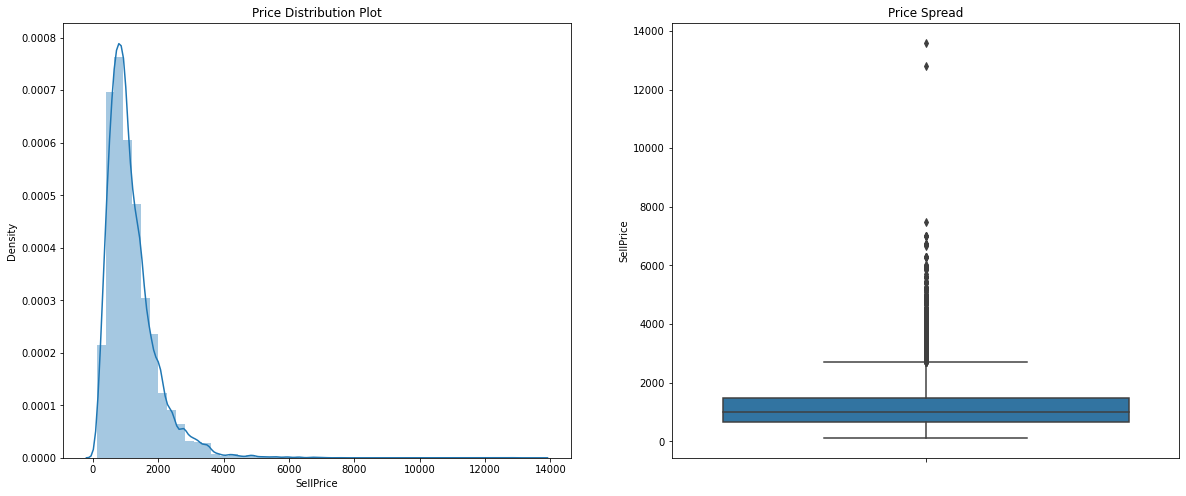

In [109]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.distplot(df.SellPrice)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.SellPrice)

plt.show()

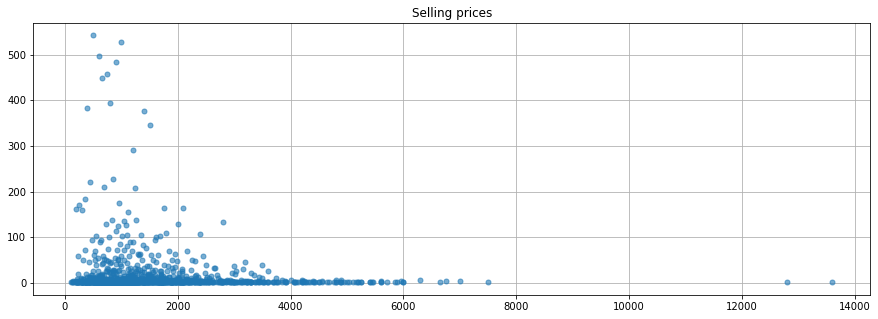

In [310]:
prices = df['SellPrice'].value_counts()
plt.figure(figsize=(15,5))

plt.grid()
plt.plot(prices, '.', alpha=0.6, markersize=10)
plt.title('Selling prices')
plt.show()

In [112]:
df.SellPrice.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

count    17931.000000
mean      1171.061792
std        746.728662
min        114.000000
25%        667.000000
50%        999.000000
75%       1484.000000
85%       1799.000000
95%       2569.500000
max      13599.000000
Name: SellPrice, dtype: float64

### Inferences:
1. the plot seems to slightly right-skewed meaning the most price in dataset are high
2. there is significant differnce between mean and median
3. 95% of the selling price is less than rs 2570
4. data points are slightly spread out from mean which indicates low variance in the price(85% of price are below
   1799) whereas the remaning 15% are  between 1799 and 13599

### Brand that is costly / affordable to the customer

In [248]:
## most costly
max_price = df['SellPrice'].max()
brand=df.loc[ max_price == df['SellPrice'],'BrandName'].iloc[0]
categ=df.loc[max_price ==df['SellPrice'],'Category'].iloc[0]
print(brand ,'is most costly among all the Brands with category ',categ ,'at Rs' ,max_price)

global desi is most costly among all the Brands with category  Indianwear-Women at Rs 13599


In [300]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)
max_price

,BrandName,Category,SellPrice
44,global desi,Indianwear-Women,13599
146,w,Indianwear-Women,7499
102,new balance,Footwear-Women,6999
46,guess,Footwear-Women,6299
18,clarks,Footwear-Women,6299
37,forever new,Westernwear-Women,6000
12,biba,Indianwear-Women,5596
94,myshka,Indianwear-Women,5399
68,juniper,Indianwear-Women,5157
77,lawman watches,Watches-Women,4999


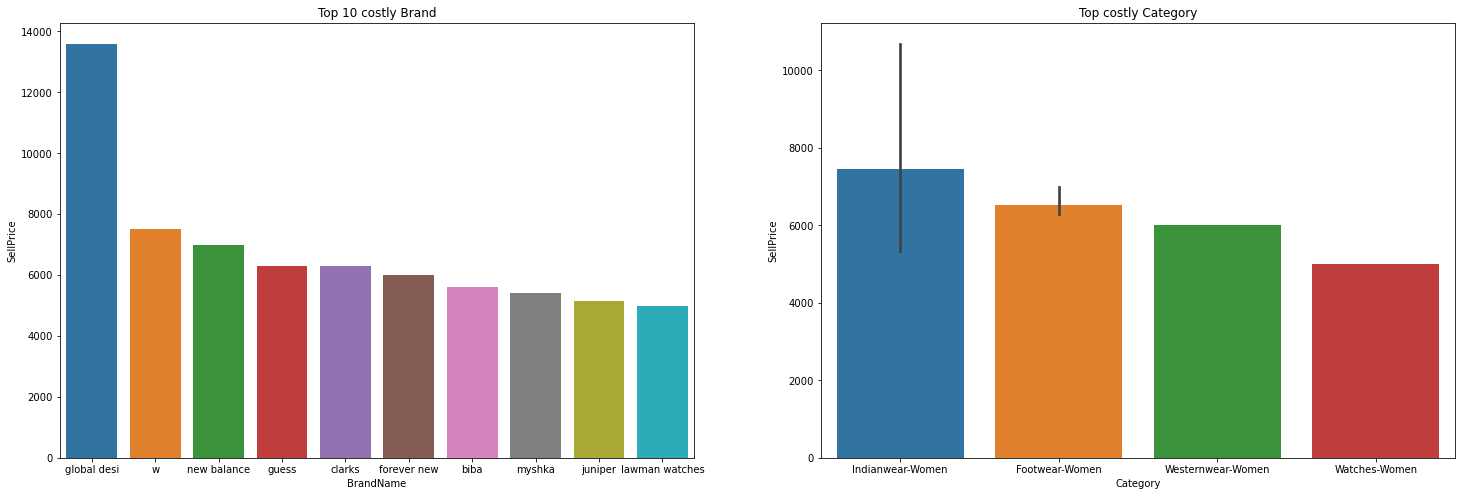

In [295]:
max_price=df.groupby(['BrandName','Category'])['SellPrice'].max().reset_index().sort_values(by='SellPrice',ascending=False).head(10)
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Top 10 costly Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=max_price)

plt.subplot(1,2,2)
plt.title('Top costly Category')
sns.barplot(x='Category' , y='SellPrice' ,data=max_price)


plt.show()


### Inferences :
1. Most Costier Brand is global desi 
2. Most costier Category is Indianwear

In [298]:
min_price=df.groupby(['BrandName','Category'])['SellPrice'].min().reset_index().sort_values(by='SellPrice',ascending=True).head(10)
min_price

,BrandName,Category,SellPrice
19,clovia,Lingerie&Nightwear-Women,114
58,insense,Lingerie&Nightwear-Women,119
100,nayomi,Lingerie&Nightwear-Women,149
29,enamor,Lingerie&Nightwear-Women,150
123,soie,Lingerie&Nightwear-Women,192
148,wacoal,Lingerie&Nightwear-Women,197
57,infuse,Westernwear-Women,199
5,altlife,Westernwear-Women,199
56,infuse,Lingerie&Nightwear-Women,199
59,insense,Westernwear-Women,199


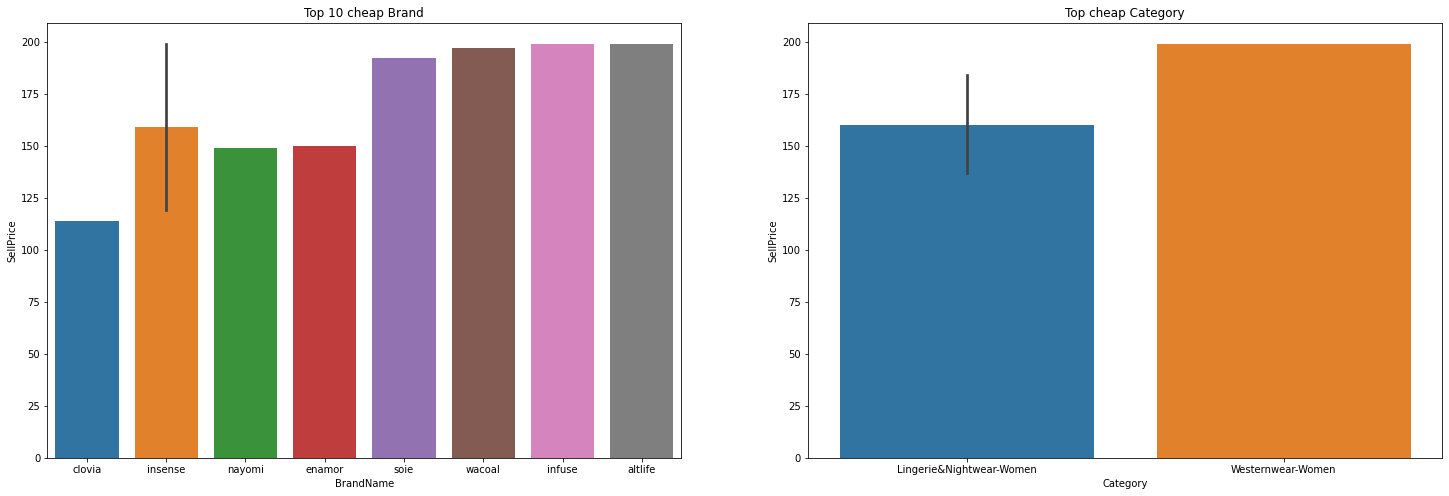

In [299]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Top 10 cheap Brand')
sns.barplot(x='BrandName' , y='SellPrice' ,data=min_price)

plt.subplot(1,2,2)
plt.title('Top cheap Category')
sns.barplot(x='Category' , y='SellPrice' ,data=min_price)


plt.show()

### Inferences :
1. Most cheapest Brand is clovia
2. Most cheapest Category is Lingeries

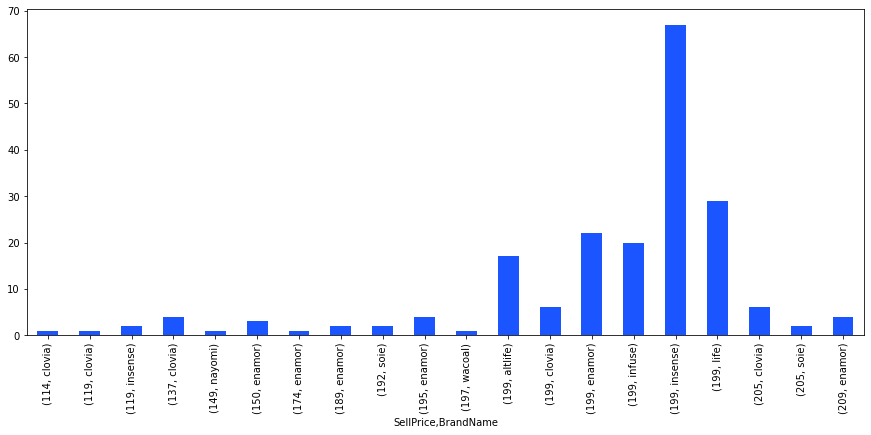

In [527]:
plt.figure(figsize=(15,6))
yearly_opening_rank = df.groupby(['SellPrice','BrandName']).BrandName.count().head(20).plot(kind = 'bar', color ='#1a55FF')
plt.show()


### Inferences : 
The above plots gives us an estimated range of clothes i.e between Rs 500 to 2500. While the plot in Yellow has slight lower range ofvalues certainly due to brands having Lingerie type of women wear.

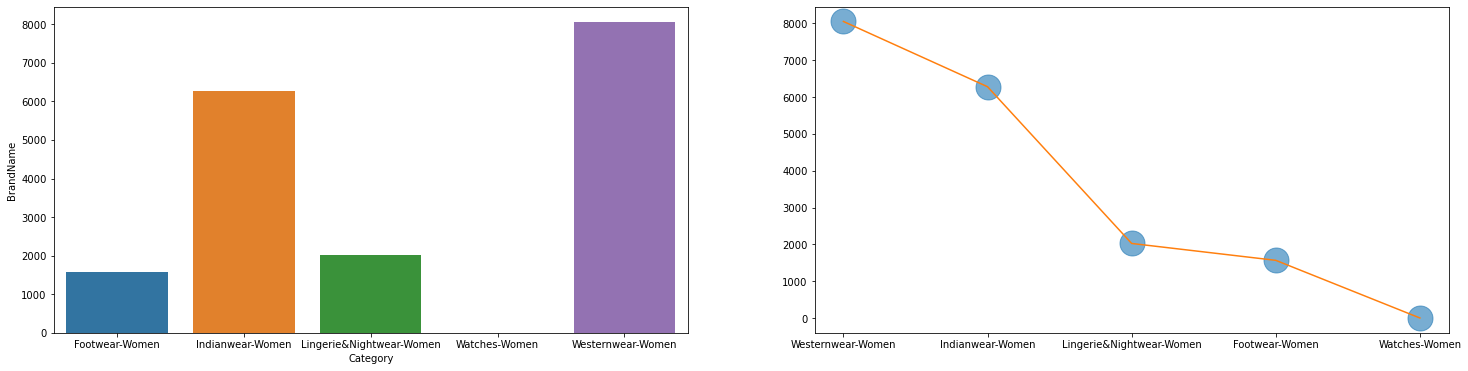

In [363]:
optional_clothing=df.groupby(['Category']).count().reset_index()

plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
sns.barplot(x='Category' , y='BrandName' ,data=optional_clothing)

optional_clothing=df['Category'].value_counts()

plt.subplot(1,2,2)
plt.plot(optional_clothing,'.', alpha=0.6, markersize=50)
plt.plot(optional_clothing)
plt.show()

### Inferences :
 Westernwear has maximum options for women wear 

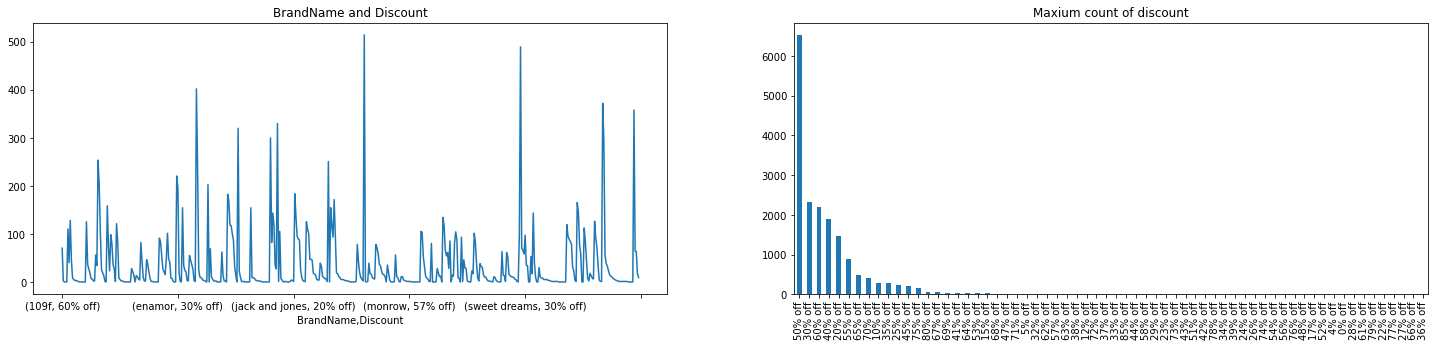

In [417]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('BrandName and Discount')
df.groupby(['BrandName'])['Discount'].value_counts().plot()

plt.subplot(1,2,2)
plt.title('Maxium count of discount')
df['Discount'].value_counts().head(100).plot(kind='bar')
plt.show()

### Inferences:
From the above plot, we can say that Most brands tuning it in about max of 50% to min of 10%.

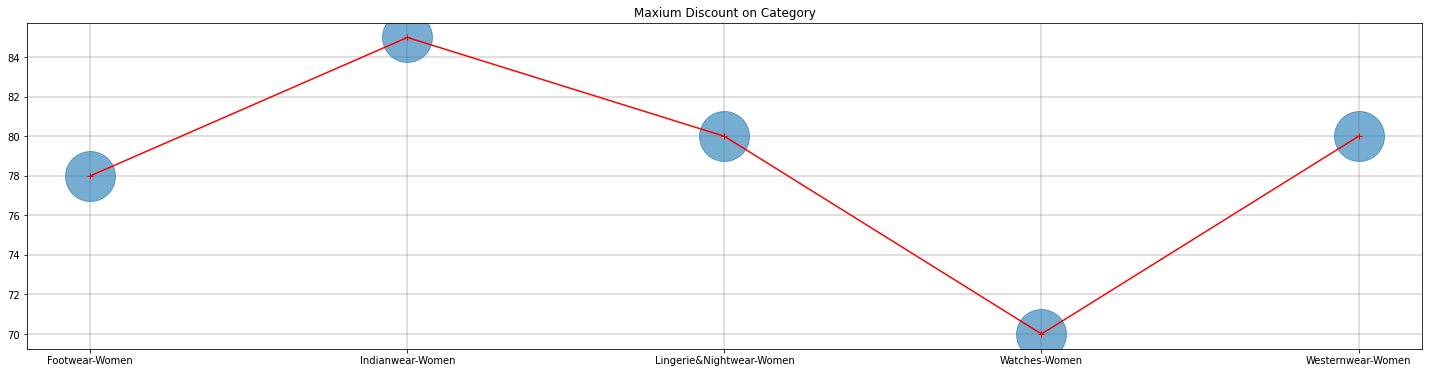

In [476]:
plt.figure(figsize=(25,6))
plt.title('Maxium Discount on Category')
Dis=df.groupby(['Category'])['Discount'].max()
plt.grid(color='black',linewidth = 0.25)
plt.plot(Dis,'.', alpha=0.6, markersize=50,marker='o')
plt.plot(Dis,color='red',marker='+')
plt.show()

### Inferences:
From the above plot, we can say that maximum Discount is given on IndianWear 

In [477]:
df.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

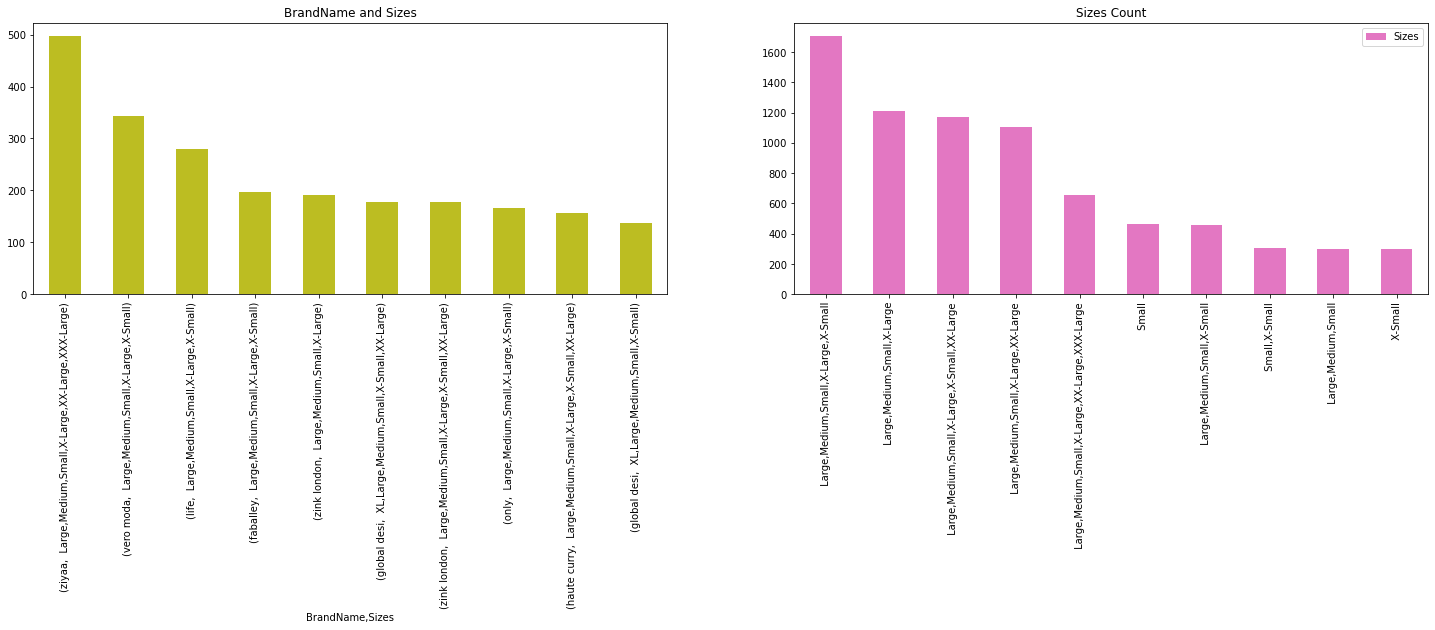

In [524]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
plt.title('BrandName and Sizes')
df.groupby(['BrandName','Sizes']).Sizes.count().sort_values(ascending=False).head(10).plot(kind='bar',color='#bcbd22')

plt.subplot(1,2,2)
plt.title('Sizes Count')
df['Sizes'].value_counts().head(10).plot(kind='bar',color='#e377c2')
plt.legend()

#### As fashion industry is progressing, the brands are trying their best to fit into every customer size from small to XL sizes as well. Thus, from the above analysis it is clear that though the gap is shortneing but their is still high demand for sizes in Small,X-Small, Medium, Large and X-Large